# Perform binary or multilabel classification of MNIST digits using Support Vector Machines, as implemented in Scikit-Learn

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from sklearn.metrics import zero_one_loss, mean_squared_error, hinge_loss, log_loss
from matplotlib import pyplot as plt

from lib.kernel_utils import mnist_svm_classifier
from lib.plot_utils import complete_plot, train_test_loss_plot

In [3]:
plt.rcParams.update({'font.size': 14})

In [4]:
default_MNIST_train_path = 'data/mnist_train.csv'
default_MNIST_test_path = 'data/mnist_test.csv'
default_labels = (0, 1)
default_pre_shuffle = False
default_proba = True

default_kwargs_svm = {'kernel': 'poly',
              'probability': True}

default_loss_function = log_loss

In [5]:
default_ylabel = default_loss_function.__name__
default_title = f'{default_labels[0]} - {default_labels[1]} MNIST digits SVM classification'

save_folder = f'fig/mnist_svm/'
!mkdir -p $save_folder

/bin/bash: port_used: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_port_used'
/bin/bash: wait_until_port_used: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_wait_until_port_used'
/bin/bash: module: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_module'
/bin/bash: find_port: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_find_port'
/bin/bash: random_number: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_random_number'
/bin/bash: helmod: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_helmod'
/bin/bash: source_helpers: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `BASH_FUNC_source_h

## An easy example, classifying 0 and 1

In [6]:
my_mnist_svm_classifier = mnist_svm_classifier(default_MNIST_train_path,
                                               default_MNIST_test_path,
                                               (0, 1),
                                               default_pre_shuffle)

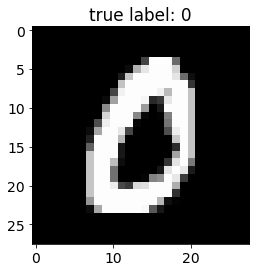

In [7]:
my_mnist_svm_classifier.show_image(25, original=True) #the 25th image in the dataset

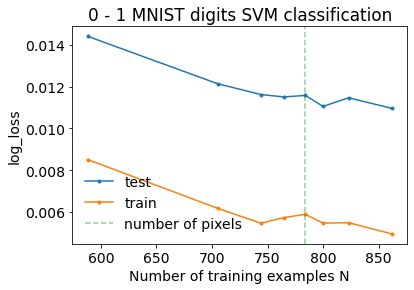

In [8]:
n_trains_reduced = np.array([588, 705, 744, 765, 784, 800, 823, 862])
train_test_loss_reduced = my_mnist_svm_classifier.pipeline_v(n_train=n_trains_reduced,
                                         loss=default_loss_function,
                                         proba=default_proba,
                                         **default_kwargs_svm)
plt.plot(n_trains_reduced, train_test_loss_reduced[1], '.-', label='test')
plt.plot(n_trains_reduced, train_test_loss_reduced[0], '.-', label='train')
complete_plot(my_mnist_svm_classifier.dimension, 
              default_title, 
              default_ylabel)
plt.savefig(save_folder + 'basic.pdf', bbox_inches='tight')

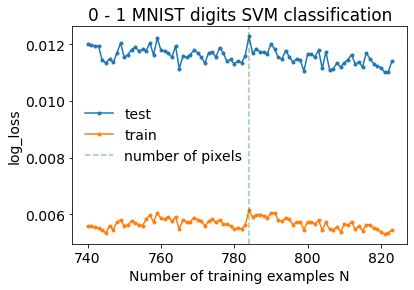

In [9]:
n_trains = np.linspace(740, 823, 823-740+1).astype(int)
train_test_loss = my_mnist_svm_classifier.pipeline_v(n_train=n_trains,
                                         loss=default_loss_function,
                                         proba=default_proba,
                                         **default_kwargs_svm)
plt.plot(n_trains, train_test_loss[1], '.-', label='test')
plt.plot(n_trains, train_test_loss[0], '.-', label='train')
complete_plot(my_mnist_svm_classifier.dimension, 
              default_title, 
              default_ylabel)
plt.savefig(save_folder + 'basic_every_point.pdf', bbox_inches='tight')

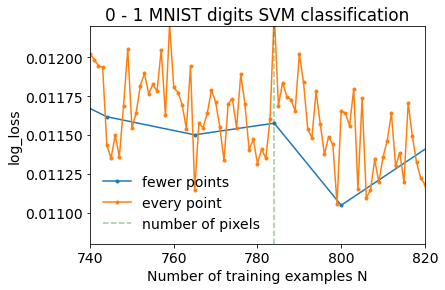

In [10]:
plt.plot(n_trains_reduced, train_test_loss_reduced[1], '.-', label='fewer points')
plt.plot(n_trains, train_test_loss[1], '.-', label='every point')
plt.xlim(740, 820)
plt.ylim(0.0108, 0.0122)
complete_plot(my_mnist_svm_classifier.dimension, 
              default_title, 
              default_ylabel)
plt.savefig(save_folder + 'basic_comparison_fine_coarse.pdf', bbox_inches='tight')

## Setting up the pipeline

In [11]:
def analytic_pipeline(MNIST_train_path=default_MNIST_train_path,
                        MNIST_test_path=default_MNIST_test_path,
                        labels=default_labels,
                        pre_shuffle=default_pre_shuffle,
                        kwargs_svm=default_kwargs_svm,
                        proba=default_proba,
                        loss_function=default_loss_function,
                        additional_scale_n_trains=1):
    
    my_mnist_svm_classifier = mnist_svm_classifier(MNIST_train_path,
                                                   MNIST_test_path,
                                                   labels,
                                                   pre_shuffle)
    n_trains = np.array([0.5, 0.75, 0.9, 0.95, 1., 1.05, 1.1, 1.25])
    n_trains = (my_mnist_svm_classifier.dimension * n_trains * additional_scale_n_trains).astype(int)
#     n_trains = np.array([500, 700, 750, 765, 784, 800, 850])
#     n_trains = (n_trains * additional_scale_n_trains).astype(int)
    n_trains = np.trim_zeros(n_trains)
    train_test_loss = my_mnist_svm_classifier.pipeline_v(n_train=n_trains,
                                         loss=loss_function,
                                         proba=proba,
                                         **default_kwargs_svm)
    return [n_trains, *train_test_loss]

analytic_pipeline_v = np.vectorize(analytic_pipeline, otypes=[np.ndarray])

## Different random samples

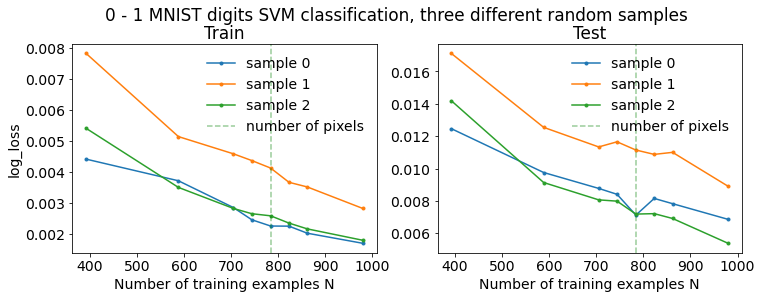

In [12]:
pre_shuffles = [True] * 3
train_test_loss = analytic_pipeline_v(pre_shuffle=pre_shuffles)
train_test_loss_plot(train_test_loss[:3], 
                     labels=[f'sample {i}' for i in range(3)],
                     title=default_title + ', three different random samples',
                     ylabel=default_ylabel)
plt.subplots_adjust(top=0.85)
plt.savefig(save_folder + 'different_samples.pdf', bbox_inches='tight')

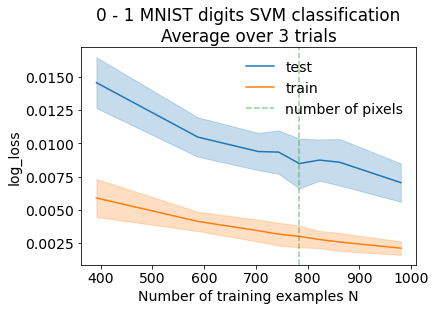

In [13]:
train_test_loss_array = np.array(train_test_loss.tolist())

n_trains = train_test_loss_array[0][0]
train_means = train_test_loss_array.mean(axis=0)[1]
test_means = train_test_loss_array.mean(axis=0)[2]
train_stds = train_test_loss_array.std(axis=0)[1]
test_stds = train_test_loss_array.std(axis=0)[2]
plt.plot(n_trains, test_means, label='test')
plt.fill_between(n_trains, test_means-test_stds, test_means+test_stds, alpha=0.25, color=plt.gca().lines[-1].get_color(), interpolate=True)
plt.plot(n_trains, train_means, label='train')
plt.fill_between(n_trains, train_means-train_stds, train_means+train_stds, alpha=0.25, color=plt.gca().lines[-1].get_color(), interpolate=True)
complete_plot(my_mnist_svm_classifier.dimension,
              title=default_title + '\n' + f'Average over {train_test_loss_array.shape[0]} trials',
              ylabel=default_ylabel)
plt.savefig(save_folder + 'different_samples_average.pdf', bbox_inches='tight')

## Averaging over 100 trials

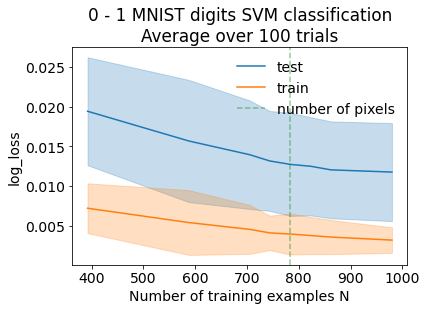

In [14]:
pre_shuffles = [True] * 100
train_test_loss = analytic_pipeline_v(pre_shuffle=pre_shuffles)

train_test_loss_array = np.array(train_test_loss.tolist())

n_trains = train_test_loss_array[0][0]
train_means = train_test_loss_array.mean(axis=0)[1]
test_means = train_test_loss_array.mean(axis=0)[2]
train_stds = train_test_loss_array.std(axis=0)[1]
test_stds = train_test_loss_array.std(axis=0)[2]
plt.plot(n_trains, test_means, label='test')
plt.fill_between(n_trains, test_means-test_stds, test_means+test_stds, alpha=0.25, color=plt.gca().lines[-1].get_color(), interpolate=True)
plt.plot(n_trains, train_means, label='train')
plt.fill_between(n_trains, train_means-train_stds, train_means+train_stds, alpha=0.25, color=plt.gca().lines[-1].get_color(), interpolate=True)
complete_plot(my_mnist_svm_classifier.dimension,
              title=default_title + '\n' + f'Average over {train_test_loss_array.shape[0]} trials',
              ylabel=default_ylabel)
plt.savefig(save_folder + 'different_samples_average_100.pdf', bbox_inches='tight')

## Different regularisation strength

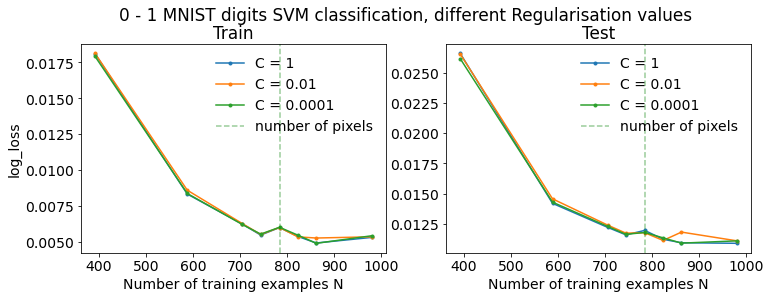

In [15]:
kwargs_svms = [{'C': 1, 'kernel': 'poly', 'probability': True}, 
               {'C': 0.01, 'kernel': 'poly', 'probability': True}, 
               {'C': 0.0001, 'kernel': 'poly', 'probability': True}, ]

train_test_loss = analytic_pipeline_v(kwargs_svm=kwargs_svms)
train_test_loss_plot(train_test_loss, 
                     [f"C = {kwargs_svm['C']}" for kwargs_svm in kwargs_svms],
                      title=default_title + ', different Regularisation values',
                     ylabel=default_ylabel)
plt.subplots_adjust(top=0.85)
plt.savefig(save_folder + 'different_regularisation.pdf', bbox_inches='tight')

## Different $\Gamma$ parameters (for the polynominal kernel)

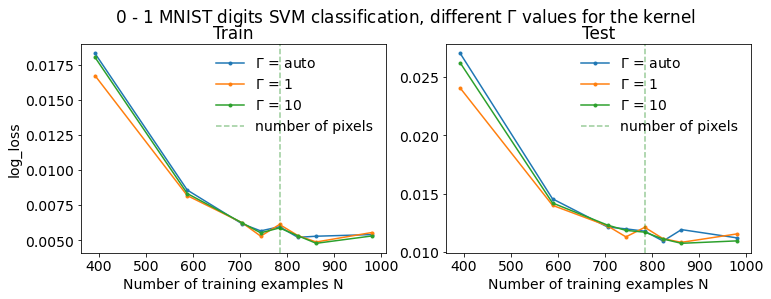

In [16]:
kwargs_svms = [{'gamma': 'auto', 'kernel': 'poly', 'probability': True}, 
                       {'gamma': 1, 'kernel': 'poly', 'probability': True}, 
                       {'gamma': 10, 'kernel': 'poly', 'probability': True}, ]

train_test_loss = analytic_pipeline_v(kwargs_svm=kwargs_svms)
train_test_loss_plot(train_test_loss, 
                     [f"$\Gamma$ = {kwargs_svm['gamma']}" for kwargs_svm in kwargs_svms],
                      title=default_title + ', different $\Gamma$ values for the kernel',
                     ylabel=default_ylabel)
plt.subplots_adjust(top=0.85)
plt.savefig(save_folder + 'different_gamma.pdf', bbox_inches='tight')

## Different digits

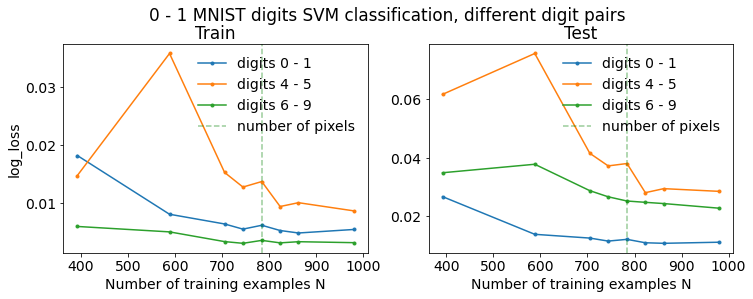

In [17]:
digit_pairs = [(0, 1),
               (4, 5),
               (6, 9)]

train_test_loss = []   
for digit_pair in digit_pairs:
    train_test_loss.append(analytic_pipeline(labels=digit_pair))
train_test_loss_plot(train_test_loss, 
                     [f'digits {digit_pair[0]} - {digit_pair[1]}' for digit_pair in digit_pairs],
                      title=default_title + ', different digit pairs',
                     ylabel=default_ylabel)
plt.subplots_adjust(top=0.85)
plt.savefig(save_folder + 'different_digits.pdf', bbox_inches='tight')

## Different loss functions

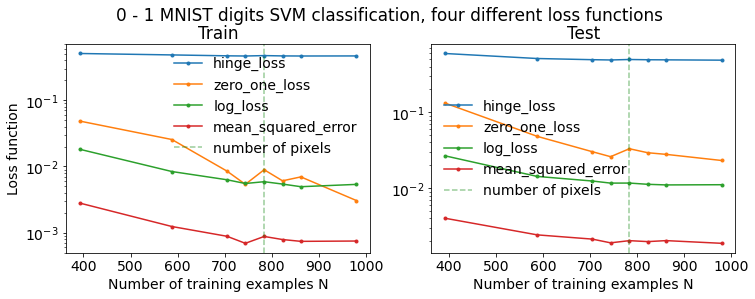

In [18]:
loss_functions = [
                    hinge_loss,
                    zero_one_loss,
                    log_loss,
                    mean_squared_error,
                  ]

train_test_loss = analytic_pipeline_v(loss_function=loss_functions)
train_test_loss_plot(train_test_loss, 
                     [loss_function.__name__ for loss_function in loss_functions],
                     title=default_title + ', four different loss functions',
                     ylabel='Loss function',
                     ylogscale=True)
plt.subplots_adjust(top=0.85)
plt.savefig(save_folder + 'different_loss_functions.pdf', bbox_inches='tight')

## Different Test set - using the rest of the training set as test set

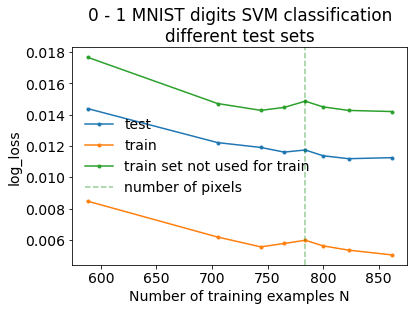

In [24]:
my_mnist_svm_classifier = mnist_svm_classifier(default_MNIST_train_path,
                                               default_MNIST_test_path,
                                               (0, 1),
                                               default_pre_shuffle)
n_trains = np.array([588, 705, 744, 765, 784, 800, 823, 862])
models = {}
train_loss = []
test_loss = []
train_not_used_loss = []
for n_train in n_trains:
    models[n_train] = my_mnist_svm_classifier.fit_model(n_train, **default_kwargs_svm)
    
    train_loss.append(my_mnist_svm_classifier.predict_and_compute_loss(models[n_train], 
                                             x_test=my_mnist_svm_classifier.x_train[:n_train], 
                                             y_test=my_mnist_svm_classifier.y_train[:n_train], 
                                             loss=default_loss_function))
    
    test_loss.append(my_mnist_svm_classifier.predict_and_compute_loss(models[n_train], 
                                             x_test=my_mnist_svm_classifier.x_test, 
                                             y_test=my_mnist_svm_classifier.y_test, 
                                             loss=default_loss_function))
    train_not_used_loss.append(my_mnist_svm_classifier.predict_and_compute_loss(models[n_train], 
                                             x_test=my_mnist_svm_classifier.x_train[n_train:], 
                                             y_test=my_mnist_svm_classifier.y_train[n_train:], 
                                             loss=default_loss_function))
plt.plot(n_trains, test_loss, '.-', label='test')
plt.plot(n_trains, train_loss, '.-', label='train')
plt.plot(n_trains, train_not_used_loss, '.-', label='train set not used for train')

complete_plot(my_mnist_svm_classifier.dimension, 
              title=default_title + '\ndifferent test sets', 
              ylabel=default_ylabel)
plt.savefig(save_folder + 'different_test_sets.pdf', bbox_inches='tight')

## Multi-label classification

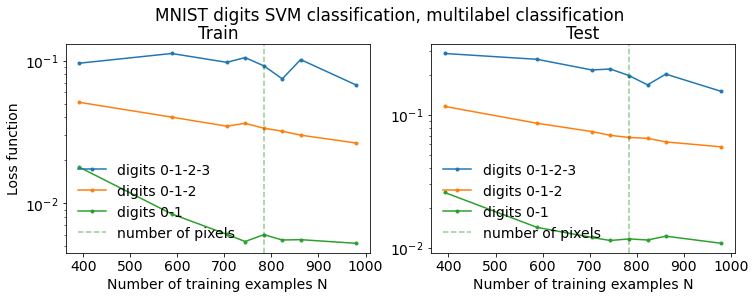

In [20]:
digit_pairs = [
               (0, 1, 2, 3),
               (0, 1, 2),
               (0, 1),
               ]

train_test_loss = []
for digit_pair in digit_pairs:
    train_test_loss.append(analytic_pipeline(labels=digit_pair))
train_test_loss_plot(train_test_loss, 
                     [f'digits ' + '-'.join([str(d) for d in digit_pair]) for digit_pair in digit_pairs],
                     title=default_title[6:] + ', multilabel classification',
                     ylabel='Loss function',
                     ylogscale=True)
plt.subplots_adjust(top=0.85)
plt.savefig(save_folder + 'multilabel_classification.pdf', bbox_inches='tight')

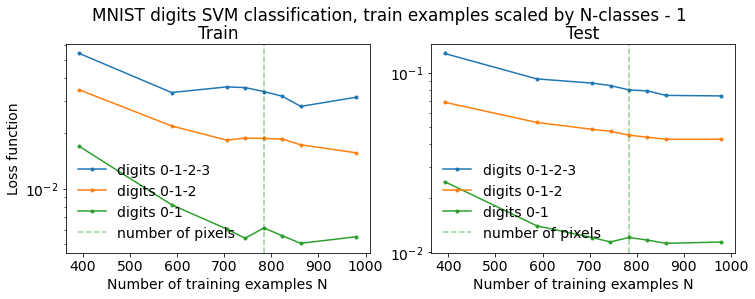

In [21]:
digit_pairs = [
               (0, 1, 2, 3),
               (0, 1, 2),
               (0, 1),
               ]

train_test_loss = []
for i, digit_pair in enumerate(digit_pairs):
    additional_scale_n_trains = (len(digit_pair) - 1)
    train_test_loss.append(analytic_pipeline(labels=digit_pair, 
                                             additional_scale_n_trains=additional_scale_n_trains))
    train_test_loss[i][0] = train_test_loss[i][0].astype(float)
    train_test_loss[i][0] /= additional_scale_n_trains
train_test_loss_plot(train_test_loss, 
                     [f'digits ' + '-'.join([str(d) for d in digit_pair]) for digit_pair in digit_pairs],
                     title=default_title[6:] + ', train examples scaled by N-classes - 1',
                     ylabel='Loss function',
                     ylogscale=True)
plt.subplots_adjust(top=0.85)
plt.savefig(save_folder + 'multilabel_classification_scaled_nclassses_minus_one.pdf', bbox_inches='tight')

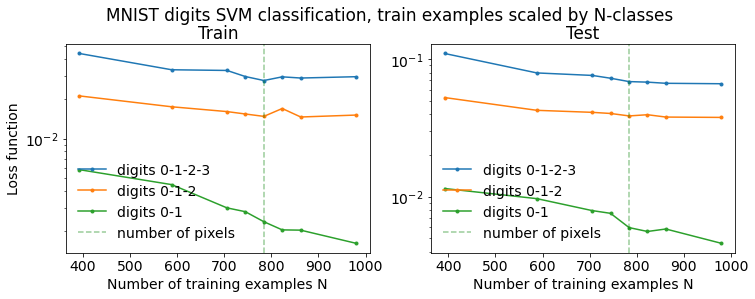

In [22]:
digit_pairs = [
               (0, 1, 2, 3),
               (0, 1, 2),
               (0, 1),
               ]

train_test_loss = []
for i, digit_pair in enumerate(digit_pairs):
    additional_scale_n_trains = (len(digit_pair))
    train_test_loss.append(analytic_pipeline(labels=digit_pair, 
                                             additional_scale_n_trains=additional_scale_n_trains))
    train_test_loss[i][0] = train_test_loss[i][0].astype(float)
    train_test_loss[i][0] /= additional_scale_n_trains
train_test_loss_plot(train_test_loss, 
                     [f'digits ' + '-'.join([str(d) for d in digit_pair]) for digit_pair in digit_pairs],
                     title=default_title[6:] + ', train examples scaled by N-classes',
                     ylabel='Loss function',
                     ylogscale=True)
plt.subplots_adjust(top=0.85)
plt.savefig(save_folder + 'multilabel_classification_scaled_nclassses.pdf', bbox_inches='tight')

## All digits classification

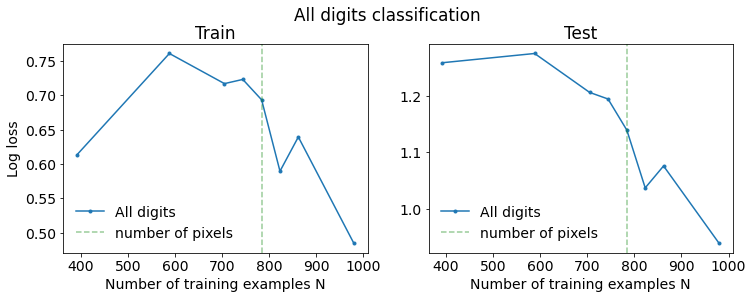

In [23]:
train_test_loss = [analytic_pipeline(labels=None)]
train_test_loss_plot(train_test_loss, 
                     [f'All digits'],
                     'All digits classification')
plt.subplots_adjust(top=0.85)
plt.savefig(save_folder + 'all_digits.pdf', bbox_inches='tight')